<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/Pyhton%20documentos/Caso_2_Comparaci%C3%B3n_y_evaluaci%C3%B3n_de_m%C3%A9tricas_de_regresi%C3%B3n_lineal_simple_vs_regresi%C3%B3n_polinomial_con_datos_FIFA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: "RUBÉN PIZARRO GURROLA"
# Date: "10-03-2022"

# Objetivo

Construir modelos de regresión lineal simple y polinómico importando datos FIFA con variable Overall y Valor para realizar predicciones evaluando y comparando su rendimiento en métricas incialmente establecidas.

# Descripción

* Cargar librerías

* Cargar datos de FIFA

* Métricas a evaluar

* Explorar datos

  * Variables independiente y dependiente

  * Visualizar dispersión de los datos

* Construir datos de entrenamiento y datos de validación.

* Regresión Lineal Simple

  * Construir el modelo

  * Predicciones

  * Metricas del modelo

* Regresión Polinómica de segundo

* Construir el modelo

  * Predicciones

  * Métricas del modelo

* Regresión Polinómica de quinto nivel

  * Construir el modelo

  * Predicciones

  * Métricas del modelo

* Interpretación

# Desarrollo



## Métricas a valorar en los modelos
Se van a realizar y evaluar métricas de las predicciones con los modelos de regresión lineal simple y regresión polinómica con los mismos datos.

Los modelos se aceptan si las métricas cumplen estos requisitos:

* El valor de R Square y R Square ajustado sobrepasa el 50%,

* Que sus variables sea estadísticamente significativas al 95%. Al menos un ‘*’

* Que el valor de RMSE (Raiz del Error Estándar Medio) sea menor que : 2 000 000 (dos millones).

Al final se deben comparar los modelos.

## Cargar librerías



In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline

## Cargar datos

Los datos se encuentran en la URL: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.FIFA.limpios.csv


In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')
datos

,Unnamed: 0,X,Name,Age,Nationality,Overall,Potential,Club,Preferred.Foot,International.Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Valor,Estatura,PesoKgs
0,1,1,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,...,28,26,6,11,15,14,8,110500000,1.70,72.12
1,2,2,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,...,31,23,7,11,15,14,11,77000000,1.88,83.01
2,3,3,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,...,24,33,9,9,15,15,11,118500000,1.75,68.04
3,4,4,De Gea,27,Spain,91,93,Manchester United,Right,4,...,21,13,90,85,87,88,94,72000000,1.93,76.20
4,5,5,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,...,58,51,15,13,5,10,13,102000000,1.80,69.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,17951,17951,J. Lundstram,19,England,47,65,Crewe Alexandra,Right,1,...,48,47,10,13,7,8,9,60000,1.75,60.78
17903,17952,17952,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Right,1,...,15,19,10,9,9,5,12,60000,1.91,77.11
17904,17953,17953,B. Worman,16,England,47,67,Cambridge United,Right,1,...,13,11,6,5,10,6,13,60000,1.73,67.13
17905,17954,17954,D. Walker-Rice,17,England,47,66,Tranmere Rovers,Right,1,...,25,27,14,6,14,8,9,60000,1.78,69.85


In [3]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (17907, 51)
Columnas y tipo de dato


Unnamed: 0                    int64
X                             int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Preferred.Foot               object
International.Reputation      int64
Weak.Foot                     int64
Skill.Moves                   int64
Height                       object
Weight                       object
Crossing                      int64
Finishing                     int64
HeadingAccuracy               int64
ShortPassing                  int64
Volleys                       int64
Dribbling                     int64
Curve                         int64
FKAccuracy                    int64
LongPassing                   int64
BallControl                   int64
Acceleration                  int64
SprintSpeed                   int64
Agility                       int64
Reactions                   

### Variables independiente y dependiente

Se identifican dos variables numéricas de interés:

* *Overall*: Reputación y jerarquía internacional numérica del jugador

* *Valor*: Sería el valor económico internacional de los jugadores

Se define a la variable independiente como *Overall* y la variable dependiente Valor, es decir, *Overall* impacta sobre *Valor* o los números económicos de la variable Valor dependen de *Overall*.

In [4]:
datos['Overall'].describe()

count    17907.000000
mean        66.239571
std          6.926818
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [5]:
datos['Valor'].describe()

count    1.790700e+04
mean     2.450133e+06
std      5.633207e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.185000e+08
Name: Valor, dtype: float64

## Dispersión de los datos


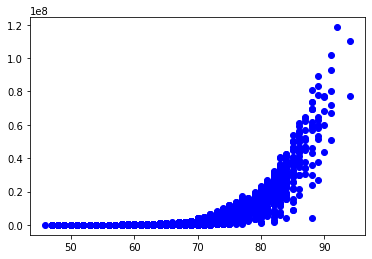

In [6]:
plt.plot(datos['Overall'], datos['Valor'], 'o', color= 'blue')

Se observa que la relación de los datos no es del todo lineal, pero se construirán los modelos de regresión lineal simple y polinómico con las mismas variables.

## Datos de entrenamiento y datos de validación

Se parten los datos 70% datos de entrenamiento y 30% datos de validación

In [7]:
overall = datos[['Overall']].to_numpy()
valor = datos[['Valor']].to_numpy()

Ahora que se tiene la variable independiente overall y la variable dependiente valor, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn.

El argumento test_size establece el 30% para datos de validación por lo que el 70% pertenece a los datos de entrenamiento

In [9]:
overall_train, overall_test, valor_train, valor_test = train_test_split(overall, valor, test_size=0.3, random_state=2022)

In [10]:
overall_train

array([[54],
       [63],
       [64],
       ...,
       [70],
       [56],
       [76]])

## Modelos de regresión

### Modelo de Regresión Lineal Simple

In [11]:
modelo_ls = LinearRegression()
modelo_ls.fit(overall_train, valor_train)

LinearRegression()

#### Coeficientes del modelo

Se determinan los valores de a y b de la fórmula
$$
Y=a+bx 
$$
ó
$$
Y=β0+β1⋅x
$$

In [12]:
a = modelo_ls.intercept_
b = modelo_ls.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)


Valor de a:  [-31408538.06038756]
Valor de b;  [[511065.1225897]]


#### Linea de tendencia del modelo
Con la el valor de los valores de tendencia o valores ajustados del modelo se visualiza la recta de tendencia del modelo.

La gráfica g se construye por partes, primero la dispersión, segundo la linea de tendencia, tercero se agrega el título, para luego solo mostrar la gráfica g.

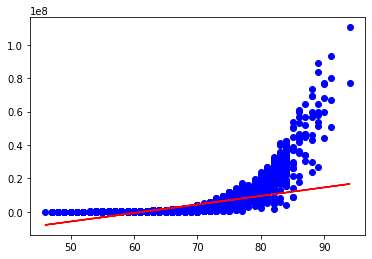

In [13]:
linea_tendencia = modelo_ls.predict(overall_train)
plt.plot(overall_train, valor_train, 'o', color= 'blue')
plt.plot(overall_train, linea_tendencia, color="red")

Se observa visualmente que la linea recta no es precisamente el mejor modelo para realizar predicciones.

### Predicciones

Las predicciones se hacen con el conjunto de datos de validación.


In [18]:
predicciones = modelo_ls.predict(overall_test)
predicciones

array([[-1766760.95018503],
       [ 6410281.01125015],
       [ 5388150.76607075],
       ...,
       [ 9476671.74678834],
       [ -233565.58241594],
       [ 4366020.52089135]])

### Determinando métricas

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.



In [19]:
diccionario = {'Overall': overall_test .flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones

,Overall,Real,Predicho
0,58,270000,-1.766761e+06
1,74,7500000,6.410281e+06
2,72,1600000,5.388151e+06
3,61,240000,-2.335656e+05
4,67,750000,2.832825e+06
...,...,...,...
5368,64,675000,1.299630e+06
5369,62,400000,2.774995e+05
5370,80,6000000,9.476672e+06
5371,61,290000,-2.335656e+05


¡Salen predicciones negativas!, ¿que significa? , no debiera haber predicciones negativas, sin embargo, esto sucede porque el modelo así lo calcula por lo estricto de la linea de recta de tendencia.

#### R Square

Es el valor de la correlación al cuadrado de las predicciones y los valores reales.Se interpreta como la representación que tienen la variable indeéndiente sobre la variabel dependinte. En este caso, que tanto Overall representa a Valor en los datos.

R2 es el coeficiente de determinación, y tiene que ver con la capacidad de un modelo para predecir futuros resultados


In [20]:
# r = np.corrcoef(overall_train.flatten().tolist(), valor_train.flatten().tolist())
# r = r ** 2
# r = r.reshape(-1,2)
# r = r[0, 1]
# print('R Square :', np.round(r, 4) )

# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))


R Square : 0.3831
R Square : 0.38299355370512567


El valor de R Square es por debajo del 40% por lo que no sobrepasa el 50% como critero, por lo cual, por este criterio el modelo **NO SE ACEPTA**.

#### rmse

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$


In [22]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))


Mean Squared Error: MSE 20862415870369.51
Root Mean Squared Error RMSE: 4567539.367139544


El valor de **rmse** está por encima los 2,000,000 (dos millones) por lo que de acuerdo a la métrica inicial establecida el modelo **¡NO SE ACEPTA!**



### Modelo de Regresión Polinomial de segundo nivel

Desde Sklearn con PolynomialFeatures, se crea un objeto polinómico de segundo nivel. Se crea otro objeto de X_poly a partir de los datos de entrenamiento y finalmente se cra el modelo polinómico de segundo nivel.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 2)
overall_poly = poly_reg.fit_transform(overall_train)
modelo_poly2 = LinearRegression()
modelo_poly2.fit(overall_poly, valor_train)



LinearRegression()

#### Curva de tendencia



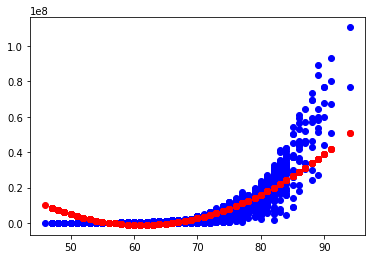

In [22]:
     #                     model.predict(overall_poly)
curva_tendencia = modelo_poly2.predict(poly_reg.fit_transform(overall_train))
plt.scatter(overall_train, valor_train, color = 'b', )
plt.scatter(overall_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()


#### Predicciones



In [23]:
predicciones = modelo_poly2.predict(poly_reg.fit_transform(overall_test))
predicciones

array([[ -631932.43541962],
       [ 6840320.94375098],
       [ 4550834.29102248],
       ...,
       [16032418.0110774 ],
       [-1118840.07800207],
       [ 2648620.48981744]])

### Determinando métricas

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a 
una lista de una dimensión.



In [24]:
diccionario = {'Overall': overall_test.flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)

,Overall,Real,Predicho
0,58,270000,-6.319324e+05
1,74,7500000,6.840321e+06
2,72,1600000,4.550834e+06
3,61,240000,-1.118840e+06
4,67,750000,5.214364e+05
5,74,4800000,6.840321e+06
6,55,120000,7.263391e+05
7,56,190000,1.767637e+05
8,63,375000,-9.593541e+05
9,64,475000,-7.343838e+05


#### R Square



In [25]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.7415
R Square : 0.7410581411870364


Como el valor de R Square está por encima del 50% el modelo **¡ SE ACEPTA!**

#### rmse


In [26]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

Mean Squared Error: MSE 8755423508526.527
Root Mean Squared Error RMSE: 2958956.489799491


El valor de **rmse** está por encima los 2,000,000 (dos millones) por lo que de acuerdo a la métrica inicial establecida el modelo polinomial de segunda potencia  **¡NO SE ACEPTA!**

### Modelo de Regresión Polinomial de segundo nivel

In [27]:
poly_reg =  PolynomialFeatures(degree = 5)
overall_poly = poly_reg.fit_transform(overall_train)
modelo_poly5 = LinearRegression()
modelo_poly5.fit(overall_poly, valor_train)


LinearRegression()

#### Curva de tendencia


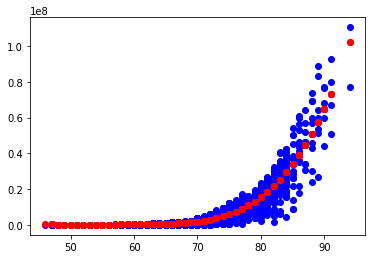

In [29]:
curva_tendencia = modelo_poly5.predict(poly_reg.fit_transform(overall_train))
plt.scatter(overall_train, valor_train, color = 'b', )
plt.scatter(overall_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

Se observa que la curva de tendencia tiene mejor ajuste que los anteriores modelos.


#### Predicciones

In [31]:
predicciones = modelo_poly5.predict(poly_reg.fit_transform(overall_test))
predicciones

array([[  244142.86845899],
       [ 4806810.8417902 ],
       [ 3018948.37114573],
       ...,
       [15593296.0537405 ],
       [  325567.50042605],
       [ 1833119.39136076]])

### Determinando métricas

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.

In [32]:
diccionario = {'Overall': overall_test.flatten().tolist(),
                'Real' : valor_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)

,Overall,Real,Predicho
0,58,270000,2.441429e+05
1,74,7500000,4.806811e+06
2,72,1600000,3.018948e+06
3,61,240000,3.255675e+05
4,67,750000,8.540914e+05
5,74,4800000,4.806811e+06
6,55,120000,1.272687e+05
7,56,190000,1.704024e+05
8,63,375000,3.984379e+05
9,64,475000,4.592944e+05


#### R  Square


In [33]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )

# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.8953
R Square : 0.8930997184094596


Como el valor de R Square está por encima del 50% el modelo **¡SE ACEPTA!**, inclusive está mejor que el modelo de regresión polinomial de segundo nivel.

#### rmse

In [34]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

Mean Squared Error: MSE 3614545916973.49
Root Mean Squared Error RMSE: 1901195.9175670166


El modelo **SI** **¡SE ACEPTA!** ya que el valor de **rmse** etá por debajo de los 2,000,000 (dos millones) que fue una métrica inicial establecida. ESte modelo se acepta en mejor en comparación con el polinómioc d esegndo nivel y el modelo de regresipon lineal simple.

# Interpretación
Pendiente ... ...

# Bibliografía

[https://ichi.pro/es/regresion-polinomial-con-python-73720766034197](https://ichi.pro/es/regresion-polinomial-con-python-73720766034197)

[https://ichi.pro/es/regresion-polinomial-en-python-239345094233430](https://ichi.pro/es/regresion-polinomial-en-python-239345094233430)